# Grid Search in sklearn
Grid Search in sklearn is very simple. We'll illustrate it with an example. Let's say we'd like to train a support vector machine, and we'd like to decide between the following parameters:

kernel: `poly` or `rbf`.
C: 0.1, 1, or 10.

### 1. Import GridSearchCV

```py
from sklearn.model_selection import GridSearchCV
```

### 2. Select the parameters:
Here we pick what are the parameters we want to choose from, and form a dictionary. In this dictionary, the keys will be the names of the parameters, and the values will be the lists of possible values for each parameter.

```py
parameters = {'kernel':['poly', 'rbf'],'C':[0.1, 1, 10]}
```

### 3. Create a scorer.
We need to decide what metric we'll use to score each of the candidate models. In here, we'll use F1 Score.
```py
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
scorer = make_scorer(f1_score)
```

### 4. Create a GridSearch Object with the parameters, and the scorer. Use this object to fit the data.

```py
# Create the object.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
# Fit the data
grid_fit = grid_obj.fit(X, y)
```

### 5. Get the best estimator.

```py

best_clf = grid_fit.best_estimator_

```

Now you can use this estimator best_clf to make the predictions.

# Improving a model with Grid Search

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Reading and plotting the data
Now, a function that will help us read the csv file, and plot the data.

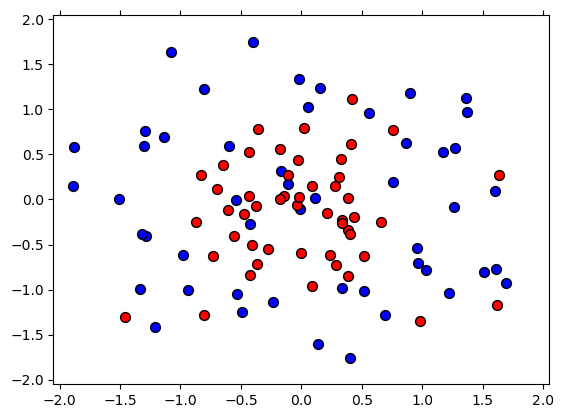

In [3]:
def load_pts(csv_name):
    data = np.asarray(pd.read_csv(csv_name, header=None))
    X = data[:,0:2]
    y = data[:,2]

    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    return X,y

X, y = load_pts('04_data.csv')
plt.show()

### 2. Splitting our data into training and testing sets

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

#Fixing a random seed
import random
random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Fitting a Decision Tree model

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Define the model (with default hyperparameters)
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

Now let's plot the model, and find the testing f1_score, to see how we did.
The following function will help us plot the model.

In [6]:
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

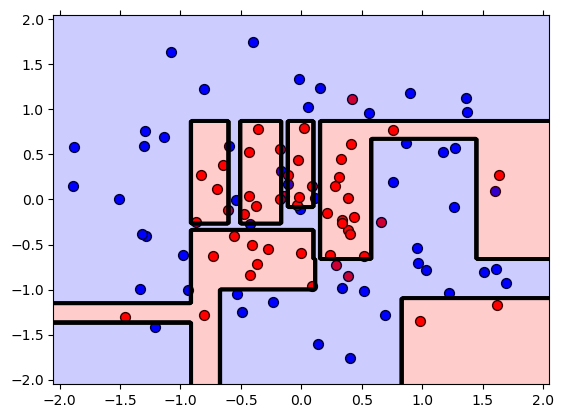

The Training F1 Score is 1.0
The Testing F1 Score is 0.7000000000000001


In [7]:
plot_model(X, y, clf)
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

Woah! Some heavy overfitting there. Not just from looking at the graph, but also from looking at the difference between the high training score (1.0) and the low testing score (0.7).Let's see if we can find better hyperparameters for this model to do better. We'll use grid search for this.



### 4. (TODO) Use grid search to improve this model.

In here, we'll do the following steps:
1. First define some parameters to perform grid search on. We suggest to play with `max_depth`, `min_samples_leaf`, and `min_samples_split`.
2. Make a scorer for the model using `f1_score`.
3. Perform grid search on the classifier, using the parameters and the scorer.
4. Fit the data to the new classifier.
5. Plot the model and find the f1_score.
6. If the model is not much better, try changing the ranges for the parameters and fit it again.

**Optional Step** - Put the steps 2-6 mentioned above inside a function `calculate_F1_Score(parameters)` to make it reusable. <br><br>
**_Hint:_ If you're stuck and would like to see a working solution, check the solutions notebook in this same folder.**

Fitting 5 folds for each of 1710 candidates, totalling 8550 fits
[CV 1/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.714 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.714 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.692 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.769 total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.667 total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=0.714 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=0.714 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=0.692 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=1, min_samples_split=3;, score=0.769 total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_leaf=1

[CV 2/5] END max_depth=1, min_samples_leaf=3, min_samples_split=6;, score=0.714 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=3, min_samples_split=6;, score=0.692 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=3, min_samples_split=6;, score=0.769 total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_leaf=3, min_samples_split=6;, score=0.667 total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_leaf=3, min_samples_split=7;, score=0.714 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=3, min_samples_split=7;, score=0.714 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=3, min_samples_split=7;, score=0.692 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=3, min_samples_split=7;, score=0.769 total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_leaf=3, min_samples_split=7;, score=0.667 total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_leaf=3, min_samples_split=8;, score=0.714 total time=   0.0s
[CV 2/5] E

[CV 3/5] END max_depth=1, min_samples_leaf=5, min_samples_split=10;, score=0.692 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=5, min_samples_split=10;, score=0.769 total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_leaf=5, min_samples_split=10;, score=0.667 total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_leaf=6, min_samples_split=2;, score=0.714 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=6, min_samples_split=2;, score=0.714 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=6, min_samples_split=2;, score=0.692 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=6, min_samples_split=2;, score=0.769 total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_leaf=6, min_samples_split=2;, score=0.667 total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_leaf=6, min_samples_split=3;, score=0.714 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=6, min_samples_split=3;, score=0.714 total time=   0.0s
[CV 3/5

[CV 5/5] END max_depth=1, min_samples_leaf=8, min_samples_split=6;, score=0.667 total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_leaf=8, min_samples_split=7;, score=0.714 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=8, min_samples_split=7;, score=0.714 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=8, min_samples_split=7;, score=0.692 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=8, min_samples_split=7;, score=0.769 total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_leaf=8, min_samples_split=7;, score=0.667 total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_leaf=8, min_samples_split=8;, score=0.714 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=8, min_samples_split=8;, score=0.714 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=8, min_samples_split=8;, score=0.692 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=8, min_samples_split=8;, score=0.769 total time=   0.0s
[CV 5/5] E

[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.640 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.720 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.783 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.640 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.720 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.783 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.900 total time=   0.0s
[CV 5/5] E

[CV 3/5] END max_depth=2, min_samples_leaf=3, min_samples_split=6;, score=0.783 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=3, min_samples_split=6;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=3, min_samples_split=6;, score=0.640 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=3, min_samples_split=7;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=3, min_samples_split=7;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=3, min_samples_split=7;, score=0.783 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=3, min_samples_split=7;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=3, min_samples_split=7;, score=0.640 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=3, min_samples_split=8;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=3, min_samples_split=8;, score=0.750 total time=   0.0s
[CV 3/5] E

[CV 2/5] END max_depth=2, min_samples_leaf=5, min_samples_split=10;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=5, min_samples_split=10;, score=0.783 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=5, min_samples_split=10;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=5, min_samples_split=10;, score=0.640 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=6, min_samples_split=2;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=6, min_samples_split=2;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=6, min_samples_split=2;, score=0.783 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=6, min_samples_split=2;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=6, min_samples_split=2;, score=0.640 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=6, min_samples_split=3;, score=0.727 total time=   0.0s
[CV 2/

[CV 1/5] END max_depth=2, min_samples_leaf=8, min_samples_split=3;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=8, min_samples_split=3;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=8, min_samples_split=3;, score=0.783 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=8, min_samples_split=3;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=8, min_samples_split=3;, score=0.640 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=8, min_samples_split=4;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=8, min_samples_split=4;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=8, min_samples_split=4;, score=0.783 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=8, min_samples_split=4;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=8, min_samples_split=4;, score=0.640 total time=   0.0s
[CV 1/5] E

[CV 1/5] END max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.783 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=10, min_samples_split=6;, score=0.640 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=10, min_samples_split=7;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=10, min_samples_split=7;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=10, min_samples_split=7;, score=0.783 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=10, min_samples_split=7;, score=0.900 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=10, min_samples_split=7;, score=0.640 total time=   0.0s


[CV 4/5] END max_depth=3, min_samples_leaf=2, min_samples_split=6;, score=0.800 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=2, min_samples_split=6;, score=0.636 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=2, min_samples_split=7;, score=0.696 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=2, min_samples_split=7;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=2, min_samples_split=7;, score=0.818 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=2, min_samples_split=7;, score=0.800 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=2, min_samples_split=7;, score=0.636 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=2, min_samples_split=8;, score=0.696 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=2, min_samples_split=8;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=2, min_samples_split=8;, score=0.818 total time=   0.0s
[CV 4/5] E

[CV 5/5] END max_depth=3, min_samples_leaf=4, min_samples_split=7;, score=0.636 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=4, min_samples_split=8;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=4, min_samples_split=8;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=4, min_samples_split=8;, score=0.818 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=4, min_samples_split=8;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=4, min_samples_split=8;, score=0.636 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=4, min_samples_split=9;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=4, min_samples_split=9;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=4, min_samples_split=9;, score=0.818 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=4, min_samples_split=9;, score=0.842 total time=   0.0s
[CV 5/5] E

[CV 5/5] END max_depth=3, min_samples_leaf=6, min_samples_split=8;, score=0.636 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=6, min_samples_split=9;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=6, min_samples_split=9;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=6, min_samples_split=9;, score=0.818 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=6, min_samples_split=9;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=6, min_samples_split=9;, score=0.636 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=6, min_samples_split=10;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=6, min_samples_split=10;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=6, min_samples_split=10;, score=0.818 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=6, min_samples_split=10;, score=0.842 total time=   0.0s
[CV 5/

[CV 4/5] END max_depth=3, min_samples_leaf=8, min_samples_split=10;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=8, min_samples_split=10;, score=0.636 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=9, min_samples_split=2;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=9, min_samples_split=2;, score=0.762 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=9, min_samples_split=2;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=9, min_samples_split=2;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=9, min_samples_split=2;, score=0.636 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=9, min_samples_split=3;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=9, min_samples_split=3;, score=0.762 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=9, min_samples_split=3;, score=0.762 total time=   0.0s
[CV 4/5]

[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=3;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=3;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=3;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=3;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 1/5] E

[CV 2/5] END max_depth=4, min_samples_leaf=3, min_samples_split=5;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=3, min_samples_split=5;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=3, min_samples_split=5;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=3, min_samples_split=5;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=3, min_samples_split=6;, score=0.696 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=3, min_samples_split=6;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=3, min_samples_split=6;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=3, min_samples_split=6;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=3, min_samples_split=6;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=3, min_samples_split=7;, score=0.696 total time=   0.0s
[CV 2/5] E

[CV 5/5] END max_depth=4, min_samples_leaf=5, min_samples_split=5;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=5, min_samples_split=6;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=5, min_samples_split=6;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=5, min_samples_split=6;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=5, min_samples_split=6;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=5, min_samples_split=6;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=5, min_samples_split=7;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=5, min_samples_split=7;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=5, min_samples_split=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=5, min_samples_split=7;, score=0.889 total time=   0.0s
[CV 5/5] E

[CV 3/5] END max_depth=4, min_samples_leaf=7, min_samples_split=6;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=7, min_samples_split=6;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=7, min_samples_split=6;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=7, min_samples_split=7;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=7, min_samples_split=7;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=7, min_samples_split=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=7, min_samples_split=7;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=7, min_samples_split=7;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=7, min_samples_split=8;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=7, min_samples_split=8;, score=0.824 total time=   0.0s
[CV 3/5] E

[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=4;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=4;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=4;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=4;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.571 total time=   0.0s
[CV 1/5] E

[CV 4/5] END max_depth=5, min_samples_leaf=4, min_samples_split=7;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=4, min_samples_split=7;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=4, min_samples_split=8;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=4, min_samples_split=8;, score=0.947 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=4, min_samples_split=8;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=4, min_samples_split=8;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=4, min_samples_split=8;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=4, min_samples_split=9;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=4, min_samples_split=9;, score=0.947 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=4, min_samples_split=9;, score=0.900 total time=   0.0s
[CV 4/5] E

[CV 2/5] END max_depth=5, min_samples_leaf=6, min_samples_split=8;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=6, min_samples_split=8;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=6, min_samples_split=8;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=6, min_samples_split=8;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=6, min_samples_split=9;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=6, min_samples_split=9;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=6, min_samples_split=9;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=6, min_samples_split=9;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=6, min_samples_split=9;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=6, min_samples_split=10;, score=0.762 total time=   0.0s
[CV 2/5] 

[CV 5/5] END max_depth=5, min_samples_leaf=8, min_samples_split=7;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=8, min_samples_split=8;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=8, min_samples_split=8;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=8, min_samples_split=8;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=8, min_samples_split=8;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=8, min_samples_split=8;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=8, min_samples_split=9;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=8, min_samples_split=9;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=8, min_samples_split=9;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=8, min_samples_split=9;, score=0.824 total time=   0.0s
[CV 5/5] E

[CV 2/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=0.667 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=10, min_samples_split=10;, score=0.600 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=1, min_samples_split=2;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=1, min_samples_split=2;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=1, min_samples_split=2;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=1, min_samples_split=2;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=1, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=1, min_samples_split=3;, score=0.727 total time=   0.0s
[C

[CV 2/5] END max_depth=6, min_samples_leaf=3, min_samples_split=2;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=3, min_samples_split=2;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=3, min_samples_split=2;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=3, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=3, min_samples_split=3;, score=0.696 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=3, min_samples_split=3;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=3, min_samples_split=3;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=3, min_samples_split=3;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=3, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=3, min_samples_split=4;, score=0.696 total time=   0.0s
[CV 2/5] E

[CV 1/5] END max_depth=6, min_samples_leaf=5, min_samples_split=3;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=5, min_samples_split=3;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=5, min_samples_split=3;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=5, min_samples_split=3;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=5, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=5, min_samples_split=4;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=5, min_samples_split=4;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=5, min_samples_split=4;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=5, min_samples_split=4;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=5, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 1/5] E

[CV 4/5] END max_depth=6, min_samples_leaf=7, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=7, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=7, min_samples_split=3;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=7, min_samples_split=3;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=7, min_samples_split=3;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=7, min_samples_split=3;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=7, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=7, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=7, min_samples_split=4;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=7, min_samples_split=4;, score=0.900 total time=   0.0s
[CV 4/5] E

[CV 3/5] END max_depth=6, min_samples_leaf=9, min_samples_split=3;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=9, min_samples_split=3;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=9, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=9, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=9, min_samples_split=4;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=9, min_samples_split=4;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=9, min_samples_split=4;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=9, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=9, min_samples_split=5;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=9, min_samples_split=5;, score=0.533 total time=   0.0s
[CV 3/5] E

[CV 4/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=1, min_samples_split=3;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=1, min_samples_split=3;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=1, min_samples_split=3;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=1, min_samples_split=3;, score=0.778 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=1, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=1, min_samples_split=4;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=1, min_samples_split=4;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=1, min_samples_split=4;, score=0.900 total time=   0.0s
[CV 4/5] E

[CV 3/5] END max_depth=7, min_samples_leaf=4, min_samples_split=9;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=4, min_samples_split=9;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=4, min_samples_split=9;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=4, min_samples_split=10;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=4, min_samples_split=10;, score=0.947 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=4, min_samples_split=10;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=4, min_samples_split=10;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=4, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=5, min_samples_split=2;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=5, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 3

[CV 3/5] END max_depth=7, min_samples_leaf=8, min_samples_split=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=8, min_samples_split=7;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=8, min_samples_split=7;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=8, min_samples_split=8;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=8, min_samples_split=8;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=8, min_samples_split=8;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=8, min_samples_split=8;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=8, min_samples_split=8;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=8, min_samples_split=9;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=8, min_samples_split=9;, score=0.533 total time=   0.0s
[CV 3/5] E

[CV 5/5] END max_depth=7, min_samples_leaf=10, min_samples_split=6;, score=0.600 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=10, min_samples_split=7;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=10, min_samples_split=7;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=10, min_samples_split=7;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=10, min_samples_split=7;, score=0.667 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=10, min_samples_split=7;, score=0.600 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=10, min_samples_split=8;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=10, min_samples_split=8;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=10, min_samples_split=8;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=10, min_samples_split=8;, score=0.667 total time=   0.0s


[CV 5/5] END max_depth=8, min_samples_leaf=2, min_samples_split=5;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=2, min_samples_split=6;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=2, min_samples_split=6;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=2, min_samples_split=6;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=2, min_samples_split=6;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=2, min_samples_split=6;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=2, min_samples_split=7;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=2, min_samples_split=7;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=2, min_samples_split=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=2, min_samples_split=7;, score=0.842 total time=   0.0s
[CV 5/5] E

[CV 3/5] END max_depth=8, min_samples_leaf=4, min_samples_split=5;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=4, min_samples_split=5;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=4, min_samples_split=5;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=4, min_samples_split=6;, score=0.700 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=4, min_samples_split=6;, score=0.947 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=4, min_samples_split=6;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=4, min_samples_split=6;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=4, min_samples_split=6;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=4, min_samples_split=7;, score=0.700 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=4, min_samples_split=7;, score=0.947 total time=   0.0s
[CV 3/5] E

[CV 4/5] END max_depth=8, min_samples_leaf=6, min_samples_split=8;, score=0.750 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=6, min_samples_split=8;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=6, min_samples_split=9;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=6, min_samples_split=9;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=6, min_samples_split=9;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=6, min_samples_split=9;, score=0.750 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=6, min_samples_split=9;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=6, min_samples_split=10;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=6, min_samples_split=10;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=6, min_samples_split=10;, score=0.778 total time=   0.0s
[CV 4/5

[CV 4/5] END max_depth=8, min_samples_leaf=9, min_samples_split=3;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=9, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=9, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=9, min_samples_split=4;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=9, min_samples_split=4;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=9, min_samples_split=4;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=9, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=9, min_samples_split=5;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=9, min_samples_split=5;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=9, min_samples_split=5;, score=0.842 total time=   0.0s
[CV 4/5] E

[CV 3/5] END max_depth=9, min_samples_leaf=1, min_samples_split=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_leaf=1, min_samples_split=7;, score=0.706 total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_leaf=1, min_samples_split=7;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_leaf=1, min_samples_split=8;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_leaf=1, min_samples_split=8;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_leaf=1, min_samples_split=8;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_leaf=1, min_samples_split=8;, score=0.706 total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_leaf=1, min_samples_split=8;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_leaf=1, min_samples_split=9;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_leaf=1, min_samples_split=9;, score=0.818 total time=   0.0s
[CV 3/5] E

[CV 4/5] END max_depth=9, min_samples_leaf=3, min_samples_split=9;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_leaf=3, min_samples_split=9;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_leaf=3, min_samples_split=10;, score=0.636 total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_leaf=3, min_samples_split=10;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_leaf=3, min_samples_split=10;, score=0.533 total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_leaf=3, min_samples_split=10;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_leaf=3, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_leaf=4, min_samples_split=2;, score=0.700 total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_leaf=4, min_samples_split=2;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_leaf=4, min_samples_split=2;, score=0.533 total time=   0.0s
[CV 4

[CV 3/5] END max_depth=9, min_samples_leaf=6, min_samples_split=2;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_leaf=6, min_samples_split=2;, score=0.750 total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_leaf=6, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_leaf=6, min_samples_split=3;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_leaf=6, min_samples_split=3;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_leaf=6, min_samples_split=3;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_leaf=6, min_samples_split=3;, score=0.750 total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_leaf=6, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_leaf=6, min_samples_split=4;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_leaf=6, min_samples_split=4;, score=0.824 total time=   0.0s
[CV 3/5] E

[CV 3/5] END max_depth=9, min_samples_leaf=8, min_samples_split=3;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_leaf=8, min_samples_split=3;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_leaf=8, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_leaf=8, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_leaf=8, min_samples_split=4;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_leaf=8, min_samples_split=4;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_leaf=8, min_samples_split=4;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_leaf=8, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_leaf=8, min_samples_split=5;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_leaf=8, min_samples_split=5;, score=0.533 total time=   0.0s
[CV 3/5] E

[CV 3/5] END max_depth=9, min_samples_leaf=10, min_samples_split=6;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_leaf=10, min_samples_split=6;, score=0.667 total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_leaf=10, min_samples_split=6;, score=0.600 total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_leaf=10, min_samples_split=7;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_leaf=10, min_samples_split=7;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_leaf=10, min_samples_split=7;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_leaf=10, min_samples_split=7;, score=0.667 total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_leaf=10, min_samples_split=7;, score=0.600 total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_leaf=10, min_samples_split=8;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_leaf=10, min_samples_split=8;, score=0.533 total time=   0.0s


[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=10;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2;, score=0.696 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=3;, score=0.696 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=3;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=3;, score=0.625 total time=   0.0

[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=6;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=6;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=6;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=6;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=6;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=7;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=7;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=7;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=7;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=7;, score=0.571 total time=   0.0s


[CV 4/5] END max_depth=10, min_samples_leaf=7, min_samples_split=10;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=7, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=8, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=8, min_samples_split=2;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=8, min_samples_split=2;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=8, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=8, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=8, min_samples_split=3;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=8, min_samples_split=3;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=8, min_samples_split=3;, score=0.900 total time=   0.0

[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=6;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=6;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=6;, score=0.667 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=6;, score=0.600 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=7;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=7;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=7;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=7;, score=0.667 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=7;, score=0.600 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=8;, score=0.667 total tim

[CV 1/5] END max_depth=11, min_samples_leaf=2, min_samples_split=10;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=11, min_samples_leaf=2, min_samples_split=10;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=11, min_samples_leaf=2, min_samples_split=10;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=11, min_samples_leaf=2, min_samples_split=10;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=11, min_samples_leaf=2, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=11, min_samples_leaf=3, min_samples_split=2;, score=0.696 total time=   0.0s
[CV 2/5] END max_depth=11, min_samples_leaf=3, min_samples_split=2;, score=0.778 total time=   0.0s
[CV 3/5] END max_depth=11, min_samples_leaf=3, min_samples_split=2;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=11, min_samples_leaf=3, min_samples_split=2;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=11, min_samples_leaf=3, min_samples_split=2;, score=0.571 total time=   

[CV 5/5] END max_depth=11, min_samples_leaf=5, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=11, min_samples_leaf=5, min_samples_split=4;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=11, min_samples_leaf=5, min_samples_split=4;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=11, min_samples_leaf=5, min_samples_split=4;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=11, min_samples_leaf=5, min_samples_split=4;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=11, min_samples_leaf=5, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=11, min_samples_leaf=5, min_samples_split=5;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=11, min_samples_leaf=5, min_samples_split=5;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=11, min_samples_leaf=5, min_samples_split=5;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=11, min_samples_leaf=5, min_samples_split=5;, score=0.889 total time=   0.0s


[CV 3/5] END max_depth=11, min_samples_leaf=7, min_samples_split=8;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=11, min_samples_leaf=7, min_samples_split=8;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=11, min_samples_leaf=7, min_samples_split=8;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=11, min_samples_leaf=7, min_samples_split=9;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=11, min_samples_leaf=7, min_samples_split=9;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=11, min_samples_leaf=7, min_samples_split=9;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=11, min_samples_leaf=7, min_samples_split=9;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=11, min_samples_leaf=7, min_samples_split=9;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=11, min_samples_leaf=7, min_samples_split=10;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=11, min_samples_leaf=7, min_samples_split=10;, score=0.824 total time=   0.0

[CV 2/5] END max_depth=11, min_samples_leaf=10, min_samples_split=2;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=11, min_samples_leaf=10, min_samples_split=2;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=11, min_samples_leaf=10, min_samples_split=2;, score=0.667 total time=   0.0s
[CV 5/5] END max_depth=11, min_samples_leaf=10, min_samples_split=2;, score=0.600 total time=   0.0s
[CV 1/5] END max_depth=11, min_samples_leaf=10, min_samples_split=3;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=11, min_samples_leaf=10, min_samples_split=3;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=11, min_samples_leaf=10, min_samples_split=3;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=11, min_samples_leaf=10, min_samples_split=3;, score=0.667 total time=   0.0s
[CV 5/5] END max_depth=11, min_samples_leaf=10, min_samples_split=3;, score=0.600 total time=   0.0s
[CV 1/5] END max_depth=11, min_samples_leaf=10, min_samples_split=4;, score=0.667 total tim

[CV 3/5] END max_depth=12, min_samples_leaf=2, min_samples_split=5;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=2, min_samples_split=5;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=2, min_samples_split=5;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=2, min_samples_split=6;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=2, min_samples_split=6;, score=0.842 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=2, min_samples_split=6;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=2, min_samples_split=6;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=2, min_samples_split=6;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=2, min_samples_split=7;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=2, min_samples_split=7;, score=0.800 total time=   0.0s


[CV 4/5] END max_depth=12, min_samples_leaf=4, min_samples_split=9;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=4, min_samples_split=9;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=4, min_samples_split=10;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=4, min_samples_split=10;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=4, min_samples_split=10;, score=0.533 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=4, min_samples_split=10;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=4, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=5, min_samples_split=2;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=5, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=5, min_samples_split=2;, score=0.625 total time=   

[CV 5/5] END max_depth=12, min_samples_leaf=7, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=7, min_samples_split=5;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=7, min_samples_split=5;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=7, min_samples_split=5;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=7, min_samples_split=5;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=7, min_samples_split=5;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=7, min_samples_split=6;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=7, min_samples_split=6;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=7, min_samples_split=6;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=7, min_samples_split=6;, score=0.824 total time=   0.0s


[CV 4/5] END max_depth=12, min_samples_leaf=9, min_samples_split=9;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=9, min_samples_split=9;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=9, min_samples_split=10;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=9, min_samples_split=10;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=9, min_samples_split=10;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=12, min_samples_leaf=9, min_samples_split=10;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=12, min_samples_leaf=9, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=12, min_samples_leaf=10, min_samples_split=2;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=12, min_samples_leaf=10, min_samples_split=2;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=12, min_samples_leaf=10, min_samples_split=2;, score=0.778 total time=

[CV 5/5] END max_depth=13, min_samples_leaf=2, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=13, min_samples_leaf=2, min_samples_split=5;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=13, min_samples_leaf=2, min_samples_split=5;, score=0.778 total time=   0.0s
[CV 3/5] END max_depth=13, min_samples_leaf=2, min_samples_split=5;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=13, min_samples_leaf=2, min_samples_split=5;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=13, min_samples_leaf=2, min_samples_split=5;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=13, min_samples_leaf=2, min_samples_split=6;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=13, min_samples_leaf=2, min_samples_split=6;, score=0.842 total time=   0.0s
[CV 3/5] END max_depth=13, min_samples_leaf=2, min_samples_split=6;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=13, min_samples_leaf=2, min_samples_split=6;, score=0.842 total time=   0.0s


[CV 4/5] END max_depth=13, min_samples_leaf=4, min_samples_split=7;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=13, min_samples_leaf=4, min_samples_split=7;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=13, min_samples_leaf=4, min_samples_split=8;, score=0.700 total time=   0.0s
[CV 2/5] END max_depth=13, min_samples_leaf=4, min_samples_split=8;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=13, min_samples_leaf=4, min_samples_split=8;, score=0.533 total time=   0.0s
[CV 4/5] END max_depth=13, min_samples_leaf=4, min_samples_split=8;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=13, min_samples_leaf=4, min_samples_split=8;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=13, min_samples_leaf=4, min_samples_split=9;, score=0.700 total time=   0.0s
[CV 2/5] END max_depth=13, min_samples_leaf=4, min_samples_split=9;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=13, min_samples_leaf=4, min_samples_split=9;, score=0.533 total time=   0.0s


[CV 5/5] END max_depth=13, min_samples_leaf=7, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=13, min_samples_leaf=7, min_samples_split=3;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=13, min_samples_leaf=7, min_samples_split=3;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=13, min_samples_leaf=7, min_samples_split=3;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=13, min_samples_leaf=7, min_samples_split=3;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=13, min_samples_leaf=7, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=13, min_samples_leaf=7, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=13, min_samples_leaf=7, min_samples_split=4;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=13, min_samples_leaf=7, min_samples_split=4;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=13, min_samples_leaf=7, min_samples_split=4;, score=0.824 total time=   0.0s


[CV 3/5] END max_depth=13, min_samples_leaf=9, min_samples_split=7;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=13, min_samples_leaf=9, min_samples_split=7;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=13, min_samples_leaf=9, min_samples_split=7;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=13, min_samples_leaf=9, min_samples_split=8;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=13, min_samples_leaf=9, min_samples_split=8;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=13, min_samples_leaf=9, min_samples_split=8;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=13, min_samples_leaf=9, min_samples_split=8;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=13, min_samples_leaf=9, min_samples_split=8;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=13, min_samples_leaf=9, min_samples_split=9;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=13, min_samples_leaf=9, min_samples_split=9;, score=0.533 total time=   0.0s


[CV 2/5] END max_depth=14, min_samples_leaf=2, min_samples_split=2;, score=0.778 total time=   0.0s
[CV 3/5] END max_depth=14, min_samples_leaf=2, min_samples_split=2;, score=0.706 total time=   0.0s
[CV 4/5] END max_depth=14, min_samples_leaf=2, min_samples_split=2;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=14, min_samples_leaf=2, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=14, min_samples_leaf=2, min_samples_split=3;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=14, min_samples_leaf=2, min_samples_split=3;, score=0.778 total time=   0.0s
[CV 3/5] END max_depth=14, min_samples_leaf=2, min_samples_split=3;, score=0.706 total time=   0.0s
[CV 4/5] END max_depth=14, min_samples_leaf=2, min_samples_split=3;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=14, min_samples_leaf=2, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=14, min_samples_leaf=2, min_samples_split=4;, score=0.727 total time=   0.0s


[CV 5/5] END max_depth=14, min_samples_leaf=3, min_samples_split=9;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=14, min_samples_leaf=3, min_samples_split=10;, score=0.636 total time=   0.0s
[CV 2/5] END max_depth=14, min_samples_leaf=3, min_samples_split=10;, score=0.857 total time=   0.0s
[CV 3/5] END max_depth=14, min_samples_leaf=3, min_samples_split=10;, score=0.533 total time=   0.0s
[CV 4/5] END max_depth=14, min_samples_leaf=3, min_samples_split=10;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=14, min_samples_leaf=3, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=14, min_samples_leaf=4, min_samples_split=2;, score=0.700 total time=   0.0s
[CV 2/5] END max_depth=14, min_samples_leaf=4, min_samples_split=2;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=14, min_samples_leaf=4, min_samples_split=2;, score=0.533 total time=   0.0s
[CV 4/5] END max_depth=14, min_samples_leaf=4, min_samples_split=2;, score=0.889 total time=   

[CV 3/5] END max_depth=14, min_samples_leaf=5, min_samples_split=9;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=14, min_samples_leaf=5, min_samples_split=9;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=14, min_samples_leaf=5, min_samples_split=9;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=14, min_samples_leaf=5, min_samples_split=10;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=14, min_samples_leaf=5, min_samples_split=10;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=14, min_samples_leaf=5, min_samples_split=10;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=14, min_samples_leaf=5, min_samples_split=10;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=14, min_samples_leaf=5, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=14, min_samples_leaf=6, min_samples_split=2;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=14, min_samples_leaf=6, min_samples_split=2;, score=0.824 total time=   

[CV 1/5] END max_depth=14, min_samples_leaf=7, min_samples_split=9;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=14, min_samples_leaf=7, min_samples_split=9;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=14, min_samples_leaf=7, min_samples_split=9;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=14, min_samples_leaf=7, min_samples_split=9;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=14, min_samples_leaf=7, min_samples_split=9;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=14, min_samples_leaf=7, min_samples_split=10;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=14, min_samples_leaf=7, min_samples_split=10;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=14, min_samples_leaf=7, min_samples_split=10;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=14, min_samples_leaf=7, min_samples_split=10;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=14, min_samples_leaf=7, min_samples_split=10;, score=0.571 total time=   

[CV 2/5] END max_depth=14, min_samples_leaf=9, min_samples_split=9;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=14, min_samples_leaf=9, min_samples_split=9;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=14, min_samples_leaf=9, min_samples_split=9;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=14, min_samples_leaf=9, min_samples_split=9;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=14, min_samples_leaf=9, min_samples_split=10;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=14, min_samples_leaf=9, min_samples_split=10;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=14, min_samples_leaf=9, min_samples_split=10;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=14, min_samples_leaf=9, min_samples_split=10;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=14, min_samples_leaf=9, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=14, min_samples_leaf=10, min_samples_split=2;, score=0.667 total time=  

[CV 2/5] END max_depth=15, min_samples_leaf=1, min_samples_split=10;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=1, min_samples_split=10;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=1, min_samples_split=10;, score=0.706 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=1, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=2, min_samples_split=2;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=2, min_samples_split=2;, score=0.778 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=2, min_samples_split=2;, score=0.706 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=2, min_samples_split=2;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=2, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=2, min_samples_split=3;, score=0.727 total time=   0

[CV 4/5] END max_depth=15, min_samples_leaf=4, min_samples_split=2;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=4, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=4, min_samples_split=3;, score=0.700 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=4, min_samples_split=3;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=4, min_samples_split=3;, score=0.533 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=4, min_samples_split=3;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=4, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=4, min_samples_split=4;, score=0.700 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=4, min_samples_split=4;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=4, min_samples_split=4;, score=0.533 total time=   0.0s


[CV 4/5] END max_depth=15, min_samples_leaf=6, min_samples_split=4;, score=0.750 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=6, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=6, min_samples_split=5;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=6, min_samples_split=5;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=6, min_samples_split=5;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=6, min_samples_split=5;, score=0.750 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=6, min_samples_split=5;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=6, min_samples_split=6;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=6, min_samples_split=6;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=6, min_samples_split=6;, score=0.778 total time=   0.0s


[CV 3/5] END max_depth=15, min_samples_leaf=8, min_samples_split=6;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=8, min_samples_split=6;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=8, min_samples_split=6;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=8, min_samples_split=7;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=8, min_samples_split=7;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=8, min_samples_split=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=8, min_samples_split=7;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=8, min_samples_split=7;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=8, min_samples_split=8;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=8, min_samples_split=8;, score=0.533 total time=   0.0s


[CV 5/5] END max_depth=15, min_samples_leaf=10, min_samples_split=9;, score=0.600 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=10, min_samples_split=10;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=10, min_samples_split=10;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=10, min_samples_split=10;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=10, min_samples_split=10;, score=0.667 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=10, min_samples_split=10;, score=0.600 total time=   0.0s
[CV 1/5] END max_depth=16, min_samples_leaf=1, min_samples_split=2;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=16, min_samples_leaf=1, min_samples_split=2;, score=0.762 total time=   0.0s
[CV 3/5] END max_depth=16, min_samples_leaf=1, min_samples_split=2;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=16, min_samples_leaf=1, min_samples_split=2;, score=0.778 total ti

[CV 5/5] END max_depth=16, min_samples_leaf=2, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=16, min_samples_leaf=3, min_samples_split=2;, score=0.696 total time=   0.0s
[CV 2/5] END max_depth=16, min_samples_leaf=3, min_samples_split=2;, score=0.778 total time=   0.0s
[CV 3/5] END max_depth=16, min_samples_leaf=3, min_samples_split=2;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=16, min_samples_leaf=3, min_samples_split=2;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=16, min_samples_leaf=3, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=16, min_samples_leaf=3, min_samples_split=3;, score=0.696 total time=   0.0s
[CV 2/5] END max_depth=16, min_samples_leaf=3, min_samples_split=3;, score=0.778 total time=   0.0s
[CV 3/5] END max_depth=16, min_samples_leaf=3, min_samples_split=3;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=16, min_samples_leaf=3, min_samples_split=3;, score=0.889 total time=   0.0s

[CV 5/5] END max_depth=16, min_samples_leaf=5, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=16, min_samples_leaf=5, min_samples_split=3;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=16, min_samples_leaf=5, min_samples_split=3;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=16, min_samples_leaf=5, min_samples_split=3;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=16, min_samples_leaf=5, min_samples_split=3;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=16, min_samples_leaf=5, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=16, min_samples_leaf=5, min_samples_split=4;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=16, min_samples_leaf=5, min_samples_split=4;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=16, min_samples_leaf=5, min_samples_split=4;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=16, min_samples_leaf=5, min_samples_split=4;, score=0.889 total time=   0.0s


[CV 5/5] END max_depth=16, min_samples_leaf=7, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=16, min_samples_leaf=7, min_samples_split=5;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=16, min_samples_leaf=7, min_samples_split=5;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=16, min_samples_leaf=7, min_samples_split=5;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=16, min_samples_leaf=7, min_samples_split=5;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=16, min_samples_leaf=7, min_samples_split=5;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=16, min_samples_leaf=7, min_samples_split=6;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=16, min_samples_leaf=7, min_samples_split=6;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=16, min_samples_leaf=7, min_samples_split=6;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=16, min_samples_leaf=7, min_samples_split=6;, score=0.824 total time=   0.0s


[CV 1/5] END max_depth=16, min_samples_leaf=9, min_samples_split=7;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=16, min_samples_leaf=9, min_samples_split=7;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=16, min_samples_leaf=9, min_samples_split=7;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=16, min_samples_leaf=9, min_samples_split=7;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=16, min_samples_leaf=9, min_samples_split=7;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=16, min_samples_leaf=9, min_samples_split=8;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=16, min_samples_leaf=9, min_samples_split=8;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=16, min_samples_leaf=9, min_samples_split=8;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=16, min_samples_leaf=9, min_samples_split=8;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=16, min_samples_leaf=9, min_samples_split=8;, score=0.571 total time=   0.0s


[CV 4/5] END max_depth=17, min_samples_leaf=2, min_samples_split=2;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=17, min_samples_leaf=2, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=17, min_samples_leaf=2, min_samples_split=3;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=17, min_samples_leaf=2, min_samples_split=3;, score=0.778 total time=   0.0s
[CV 3/5] END max_depth=17, min_samples_leaf=2, min_samples_split=3;, score=0.706 total time=   0.0s
[CV 4/5] END max_depth=17, min_samples_leaf=2, min_samples_split=3;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=17, min_samples_leaf=2, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=17, min_samples_leaf=2, min_samples_split=4;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=17, min_samples_leaf=2, min_samples_split=4;, score=0.778 total time=   0.0s
[CV 3/5] END max_depth=17, min_samples_leaf=2, min_samples_split=4;, score=0.706 total time=   0.0s


[CV 1/5] END max_depth=17, min_samples_leaf=4, min_samples_split=6;, score=0.700 total time=   0.0s
[CV 2/5] END max_depth=17, min_samples_leaf=4, min_samples_split=6;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=17, min_samples_leaf=4, min_samples_split=6;, score=0.533 total time=   0.0s
[CV 4/5] END max_depth=17, min_samples_leaf=4, min_samples_split=6;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=17, min_samples_leaf=4, min_samples_split=6;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=17, min_samples_leaf=4, min_samples_split=7;, score=0.700 total time=   0.0s
[CV 2/5] END max_depth=17, min_samples_leaf=4, min_samples_split=7;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=17, min_samples_leaf=4, min_samples_split=7;, score=0.533 total time=   0.0s
[CV 4/5] END max_depth=17, min_samples_leaf=4, min_samples_split=7;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=17, min_samples_leaf=4, min_samples_split=7;, score=0.571 total time=   0.0s


[CV 3/5] END max_depth=17, min_samples_leaf=6, min_samples_split=10;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=17, min_samples_leaf=6, min_samples_split=10;, score=0.750 total time=   0.0s
[CV 5/5] END max_depth=17, min_samples_leaf=6, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=17, min_samples_leaf=7, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=17, min_samples_leaf=7, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=17, min_samples_leaf=7, min_samples_split=2;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=17, min_samples_leaf=7, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=17, min_samples_leaf=7, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=17, min_samples_leaf=7, min_samples_split=3;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=17, min_samples_leaf=7, min_samples_split=3;, score=0.824 total time=   0.

[CV 3/5] END max_depth=17, min_samples_leaf=9, min_samples_split=5;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=17, min_samples_leaf=9, min_samples_split=5;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=17, min_samples_leaf=9, min_samples_split=5;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=17, min_samples_leaf=9, min_samples_split=6;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=17, min_samples_leaf=9, min_samples_split=6;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=17, min_samples_leaf=9, min_samples_split=6;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=17, min_samples_leaf=9, min_samples_split=6;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=17, min_samples_leaf=9, min_samples_split=6;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=17, min_samples_leaf=9, min_samples_split=7;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=17, min_samples_leaf=9, min_samples_split=7;, score=0.533 total time=   0.0s


[CV 4/5] END max_depth=18, min_samples_leaf=1, min_samples_split=6;, score=0.706 total time=   0.0s
[CV 5/5] END max_depth=18, min_samples_leaf=1, min_samples_split=6;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=18, min_samples_leaf=1, min_samples_split=7;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=18, min_samples_leaf=1, min_samples_split=7;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=18, min_samples_leaf=1, min_samples_split=7;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=18, min_samples_leaf=1, min_samples_split=7;, score=0.706 total time=   0.0s
[CV 5/5] END max_depth=18, min_samples_leaf=1, min_samples_split=7;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=18, min_samples_leaf=1, min_samples_split=8;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=18, min_samples_leaf=1, min_samples_split=8;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=18, min_samples_leaf=1, min_samples_split=8;, score=0.900 total time=   0.0s


[CV 3/5] END max_depth=18, min_samples_leaf=3, min_samples_split=7;, score=0.533 total time=   0.0s
[CV 4/5] END max_depth=18, min_samples_leaf=3, min_samples_split=7;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=18, min_samples_leaf=3, min_samples_split=7;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=18, min_samples_leaf=3, min_samples_split=8;, score=0.636 total time=   0.0s
[CV 2/5] END max_depth=18, min_samples_leaf=3, min_samples_split=8;, score=0.800 total time=   0.0s
[CV 3/5] END max_depth=18, min_samples_leaf=3, min_samples_split=8;, score=0.533 total time=   0.0s
[CV 4/5] END max_depth=18, min_samples_leaf=3, min_samples_split=8;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=18, min_samples_leaf=3, min_samples_split=8;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=18, min_samples_leaf=3, min_samples_split=9;, score=0.636 total time=   0.0s
[CV 2/5] END max_depth=18, min_samples_leaf=3, min_samples_split=9;, score=0.857 total time=   0.0s


[CV 1/5] END max_depth=18, min_samples_leaf=5, min_samples_split=9;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=18, min_samples_leaf=5, min_samples_split=9;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=18, min_samples_leaf=5, min_samples_split=9;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=18, min_samples_leaf=5, min_samples_split=9;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=18, min_samples_leaf=5, min_samples_split=9;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=18, min_samples_leaf=5, min_samples_split=10;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=18, min_samples_leaf=5, min_samples_split=10;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=18, min_samples_leaf=5, min_samples_split=10;, score=0.625 total time=   0.0s
[CV 4/5] END max_depth=18, min_samples_leaf=5, min_samples_split=10;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=18, min_samples_leaf=5, min_samples_split=10;, score=0.571 total time=   

[CV 2/5] END max_depth=18, min_samples_leaf=8, min_samples_split=2;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=18, min_samples_leaf=8, min_samples_split=2;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=18, min_samples_leaf=8, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=18, min_samples_leaf=8, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=18, min_samples_leaf=8, min_samples_split=3;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=18, min_samples_leaf=8, min_samples_split=3;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=18, min_samples_leaf=8, min_samples_split=3;, score=0.900 total time=   0.0s
[CV 4/5] END max_depth=18, min_samples_leaf=8, min_samples_split=3;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=18, min_samples_leaf=8, min_samples_split=3;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=18, min_samples_leaf=8, min_samples_split=4;, score=0.737 total time=   0.0s


[CV 3/5] END max_depth=18, min_samples_leaf=10, min_samples_split=4;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=18, min_samples_leaf=10, min_samples_split=4;, score=0.667 total time=   0.0s
[CV 5/5] END max_depth=18, min_samples_leaf=10, min_samples_split=4;, score=0.600 total time=   0.0s
[CV 1/5] END max_depth=18, min_samples_leaf=10, min_samples_split=5;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=18, min_samples_leaf=10, min_samples_split=5;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=18, min_samples_leaf=10, min_samples_split=5;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=18, min_samples_leaf=10, min_samples_split=5;, score=0.667 total time=   0.0s
[CV 5/5] END max_depth=18, min_samples_leaf=10, min_samples_split=5;, score=0.600 total time=   0.0s
[CV 1/5] END max_depth=18, min_samples_leaf=10, min_samples_split=6;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=18, min_samples_leaf=10, min_samples_split=6;, score=0.533 total tim

[CV 5/5] END max_depth=19, min_samples_leaf=2, min_samples_split=5;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=19, min_samples_leaf=2, min_samples_split=6;, score=0.727 total time=   0.0s
[CV 2/5] END max_depth=19, min_samples_leaf=2, min_samples_split=6;, score=0.842 total time=   0.0s
[CV 3/5] END max_depth=19, min_samples_leaf=2, min_samples_split=6;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=19, min_samples_leaf=2, min_samples_split=6;, score=0.842 total time=   0.0s
[CV 5/5] END max_depth=19, min_samples_leaf=2, min_samples_split=6;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=19, min_samples_leaf=2, min_samples_split=7;, score=0.667 total time=   0.0s
[CV 2/5] END max_depth=19, min_samples_leaf=2, min_samples_split=7;, score=0.800 total time=   0.0s
[CV 3/5] END max_depth=19, min_samples_leaf=2, min_samples_split=7;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=19, min_samples_leaf=2, min_samples_split=7;, score=0.842 total time=   0.0s


[CV 3/5] END max_depth=19, min_samples_leaf=4, min_samples_split=7;, score=0.533 total time=   0.0s
[CV 4/5] END max_depth=19, min_samples_leaf=4, min_samples_split=7;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=19, min_samples_leaf=4, min_samples_split=7;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=19, min_samples_leaf=4, min_samples_split=8;, score=0.700 total time=   0.0s
[CV 2/5] END max_depth=19, min_samples_leaf=4, min_samples_split=8;, score=0.750 total time=   0.0s
[CV 3/5] END max_depth=19, min_samples_leaf=4, min_samples_split=8;, score=0.533 total time=   0.0s
[CV 4/5] END max_depth=19, min_samples_leaf=4, min_samples_split=8;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=19, min_samples_leaf=4, min_samples_split=8;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=19, min_samples_leaf=4, min_samples_split=9;, score=0.700 total time=   0.0s
[CV 2/5] END max_depth=19, min_samples_leaf=4, min_samples_split=9;, score=0.750 total time=   0.0s


[CV 2/5] END max_depth=19, min_samples_leaf=6, min_samples_split=9;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=19, min_samples_leaf=6, min_samples_split=9;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=19, min_samples_leaf=6, min_samples_split=9;, score=0.750 total time=   0.0s
[CV 5/5] END max_depth=19, min_samples_leaf=6, min_samples_split=9;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=19, min_samples_leaf=6, min_samples_split=10;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=19, min_samples_leaf=6, min_samples_split=10;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=19, min_samples_leaf=6, min_samples_split=10;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=19, min_samples_leaf=6, min_samples_split=10;, score=0.750 total time=   0.0s
[CV 5/5] END max_depth=19, min_samples_leaf=6, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=19, min_samples_leaf=7, min_samples_split=2;, score=0.737 total time=   

[CV 5/5] END max_depth=19, min_samples_leaf=8, min_samples_split=10;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=19, min_samples_leaf=9, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=19, min_samples_leaf=9, min_samples_split=2;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=19, min_samples_leaf=9, min_samples_split=2;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=19, min_samples_leaf=9, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=19, min_samples_leaf=9, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 1/5] END max_depth=19, min_samples_leaf=9, min_samples_split=3;, score=0.737 total time=   0.0s
[CV 2/5] END max_depth=19, min_samples_leaf=9, min_samples_split=3;, score=0.533 total time=   0.0s
[CV 3/5] END max_depth=19, min_samples_leaf=9, min_samples_split=3;, score=0.842 total time=   0.0s
[CV 4/5] END max_depth=19, min_samples_leaf=9, min_samples_split=3;, score=0.824 total time=   0.0s

[CV 5/5] END max_depth=19, min_samples_leaf=10, min_samples_split=10;, score=0.600 total time=   0.0s
The training F1 Score is 0.8148148148148148
The testing F1 Score is 0.8


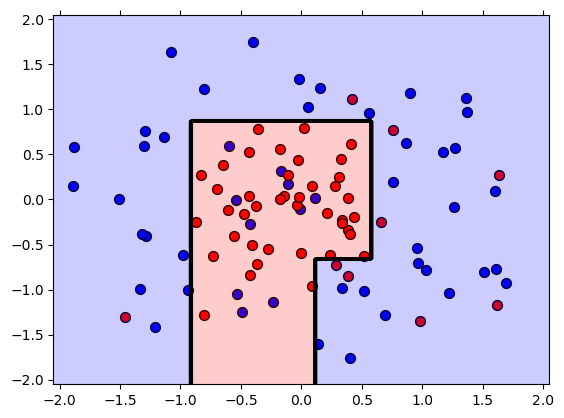

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=42)


In [20]:
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

# Create the parameters list you wish to tune.
parameters = {'max_depth':np.arange(1,20),'min_samples_leaf':np.arange(1,11),'min_samples_split':np.arange(2,11)}

def calculate_F1_Score(parameters):
    # Make an fbeta_score scoring object.
    scorer = make_scorer(f1_score)

    # Perform grid search on the classifier using 'scorer' as the scoring method.
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer,verbose=3)

    # Fit the grid search object to the training data and find the optimal parameters.
    grid_fit = grid_obj.fit(X,y)

    # TGet the estimator.
    best_clf = grid_fit.best_estimator_

    # Fit the new model.
    best_clf.fit(X_train, y_train)

    # Make predictions using the new model.
    best_train_predictions = best_clf.predict(X_train)
    best_test_predictions = best_clf.predict(X_test)

    # Calculate the f1_score of the new model.
    print('The training F1 Score is', f1_score(best_train_predictions, y_train))
    print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

    # Plot the new model.
    plot_model(X, y, best_clf)

    # Let's also explore what parameters ended up being used in the new model.
    print(best_clf)

#----------------------------------------------#

# Call the function
calculate_F1_Score(parameters)